**IMPORTING LIBRARIES FOR THE ANALYSIS**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Sample Data**


In [7]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\trendmart_large_sales_data.csv")

In [9]:
data

,Invoice ID,Date,Product,Category,Quantity,Unit Price,Total,Payment Method,Customer Type
0,INV1000,2025-02-01,Pants,Apparel,5,800,4000,UPI,Returning
1,INV1001,2025-04-17,Watch,Accessories,4,1500,6000,UPI,New
2,INV1002,2025-04-19,Hat,Accessories,3,300,900,Wallet,New
3,INV1003,2025-02-26,Pants,Apparel,1,800,800,UPI,New
4,INV1004,2025-03-20,Shirt,Apparel,1,500,500,Wallet,Returning
...,...,...,...,...,...,...,...,...,...
495,INV1495,2025-06-17,Pants,Apparel,4,800,3200,Cash,Returning
496,INV1496,2025-06-07,Shirt,Apparel,1,500,500,UPI,New
497,INV1497,2025-05-29,Shirt,Apparel,5,500,2500,Card,Returning
498,INV1498,2025-03-30,Hat,Accessories,5,300,1500,UPI,New


**Exploratory Data Analysis**

In [14]:
data.head()

,Invoice ID,Date,Product,Category,Quantity,Unit Price,Total,Payment Method,Customer Type
0,INV1000,2025-02-01,Pants,Apparel,5,800,4000,UPI,Returning
1,INV1001,2025-04-17,Watch,Accessories,4,1500,6000,UPI,New
2,INV1002,2025-04-19,Hat,Accessories,3,300,900,Wallet,New
3,INV1003,2025-02-26,Pants,Apparel,1,800,800,UPI,New
4,INV1004,2025-03-20,Shirt,Apparel,1,500,500,Wallet,Returning


In [16]:
data.tail()

,Invoice ID,Date,Product,Category,Quantity,Unit Price,Total,Payment Method,Customer Type
495,INV1495,2025-06-17,Pants,Apparel,4,800,3200,Cash,Returning
496,INV1496,2025-06-07,Shirt,Apparel,1,500,500,UPI,New
497,INV1497,2025-05-29,Shirt,Apparel,5,500,2500,Card,Returning
498,INV1498,2025-03-30,Hat,Accessories,5,300,1500,UPI,New
499,INV1499,2025-04-15,Shoes,Footwear,1,1200,1200,Card,New


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Invoice ID      500 non-null    object
 1   Date            500 non-null    object
 2   Product         500 non-null    object
 3   Category        500 non-null    object
 4   Quantity        500 non-null    int64 
 5   Unit Price      500 non-null    int64 
 6   Total           500 non-null    int64 
 7   Payment Method  500 non-null    object
 8   Customer Type   500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [24]:
data.describe()

,Quantity,Unit Price,Total
count,500.000000,500.000000,500.000000
mean,2.956000,957.400000,2851.000000
std,1.456815,587.823369,2475.130611
min,1.000000,300.000000,300.000000
25%,2.000000,400.000000,1200.000000
50%,3.000000,800.000000,2000.000000
75%,4.000000,1500.000000,4000.000000
max,5.000000,2000.000000,10000.000000


In [29]:
data.columns

Index(['Invoice ID', 'Date', 'Product', 'Category', 'Quantity', 'Unit Price',
       'Total', 'Payment Method', 'Customer Type'],
      dtype='object')

**Total Sales**

In [38]:
Total_sales = data['Total'].sum()
print(f"Total Sales : ${Total_sales}")

Total Sales : $1425500


**Sales by Products**

In [160]:
sales_by_product = data.groupby('Product')['Total'].sum().sort_values(ascending=False).reset_index()
sales_by_product

,Product,Total
0,Jacket,470000
1,Watch,285000
2,Shoes,279600
3,Pants,126400
4,Shirt,108500
5,T-Shirt,90000
6,Hat,66000


**Sales by product count**

In [162]:
sales_by_product_count = data['Product'].value_counts().sort_values(ascending=False).reset_index()
sales_by_product_count

,Product,count
0,Shoes,83
1,Shirt,74
2,Hat,73
3,T-Shirt,72
4,Watch,70
5,Jacket,70
6,Pants,58


**Sales by Payment Method**

In [164]:
sales_by_payment_method = data.groupby('Payment Method')['Total'].count().sort_values(ascending=False).reset_index()
sales_by_payment_method

,Payment Method,Total
0,Cash,143
1,UPI,129
2,Wallet,121
3,Card,107


In [ ]:
#there is one more way we can calculate sales payment with the help of ________value_counts()

**Sales by customer type**

In [166]:
customer_type = data['Customer Type'].value_counts().reset_index()
customer_type

,Customer Type,count
0,Returning,258
1,New,242


**Visualizations**

**Sales Over Time**

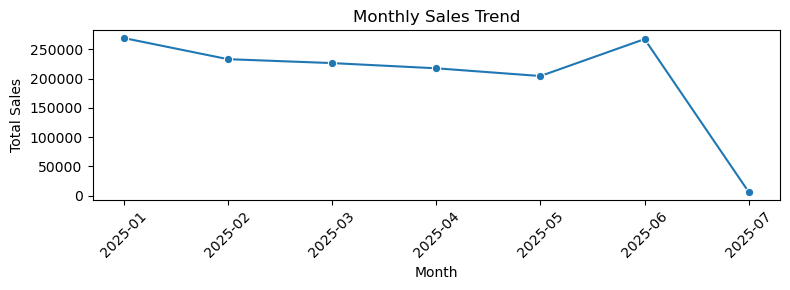

In [147]:
data['Date'] = pd.to_datetime(data['Date'])  
data['Month'] = data['Date'].dt.to_period('M')  # Month Period (e.g. 2025-01)

monthly_sales = data.groupby('Month')['Total'].sum()

plt.figure(figsize=(8, 3))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


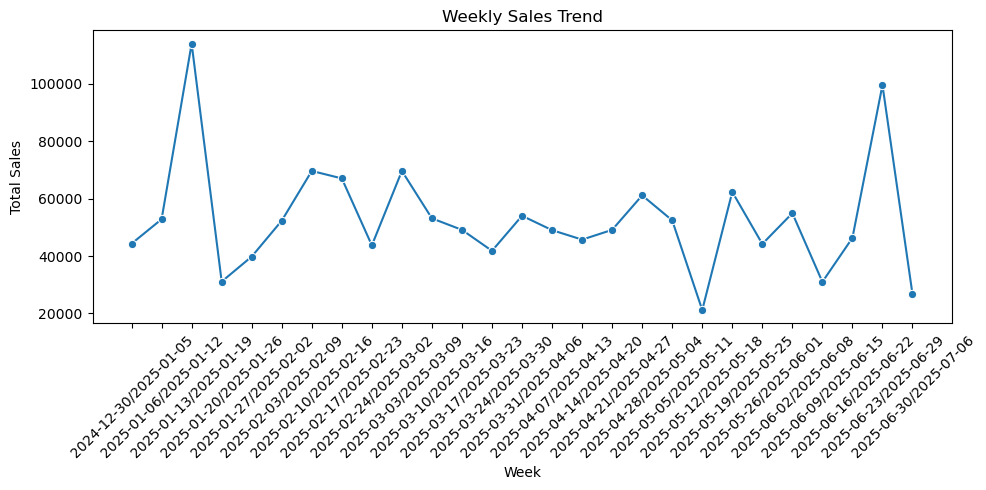

In [133]:
data['Week'] = data['Date'].dt.to_period('W')

weekly_sales = data.groupby('Week')['Total'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_sales.index.astype(str), y=weekly_sales.values, marker='o')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


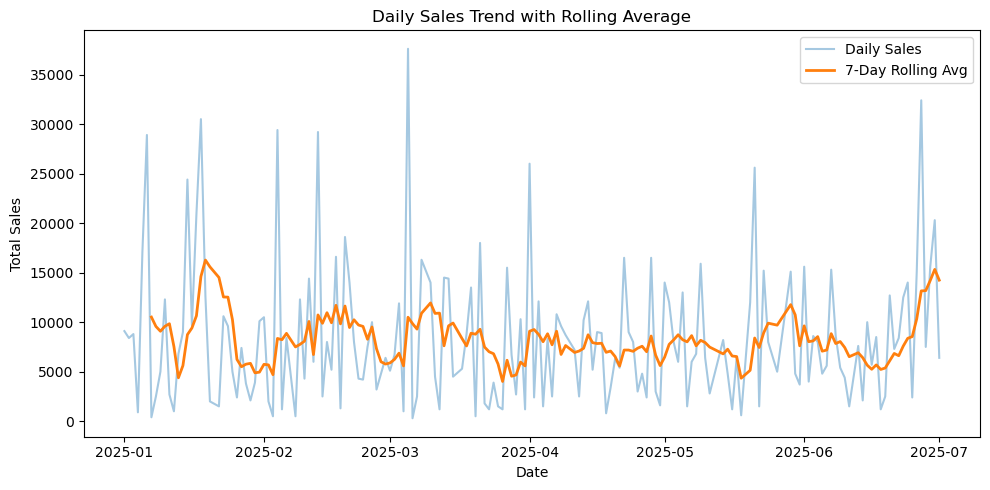

In [135]:
daily_sales = data.groupby('Date')['Total'].sum().sort_index()
rolling_avg = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sales, label='Daily Sales', alpha=0.4)
sns.lineplot(data=rolling_avg, label='7-Day Rolling Avg', linewidth=2)
plt.title("Daily Sales Trend with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.tight_layout()
plt.show()


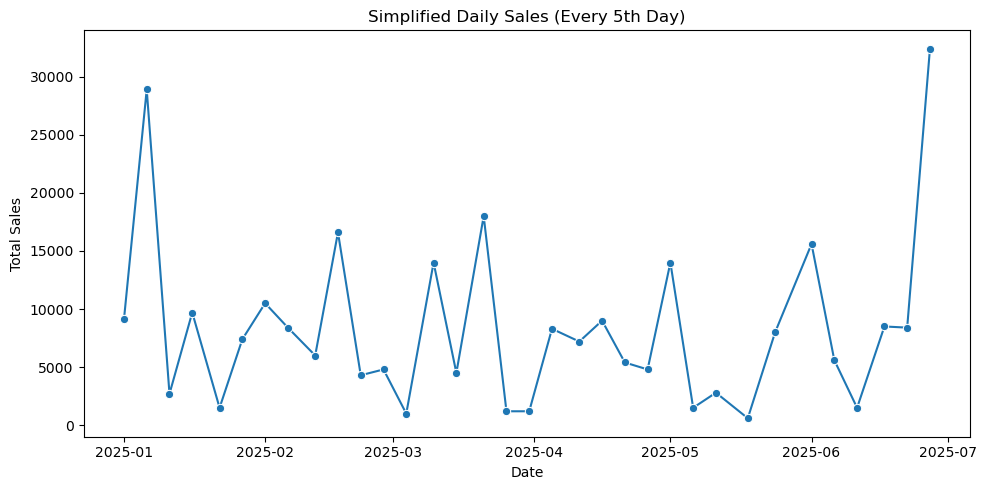

In [137]:
sampled_sales = daily_sales[::5]  # Every 5th row

plt.figure(figsize=(10, 5))
sns.lineplot(x=sampled_sales.index, y=sampled_sales.values, marker='o')
plt.title("Simplified Daily Sales (Every 5th Day)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [118]:
import warnings
warnings.filterwarnings("ignore")

**Sales by Product**

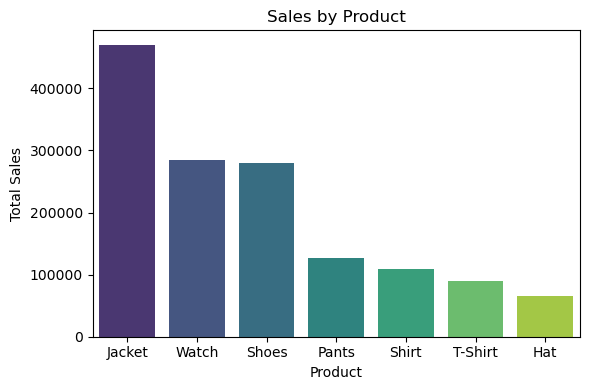

In [120]:
plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_product.index,y=sales_by_product.values,palette='viridis')
plt.title("Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Payment Method Distribution**

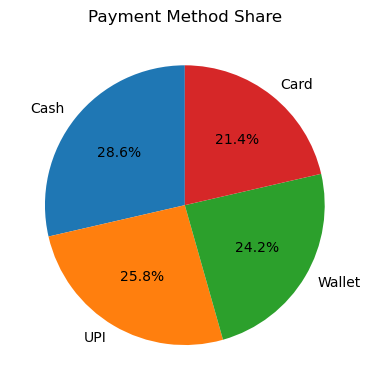

In [124]:
plt.figure(figsize=(6, 4))
data['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Share")
plt.ylabel("")
plt.tight_layout()
plt.show()

**Customer Distribution**

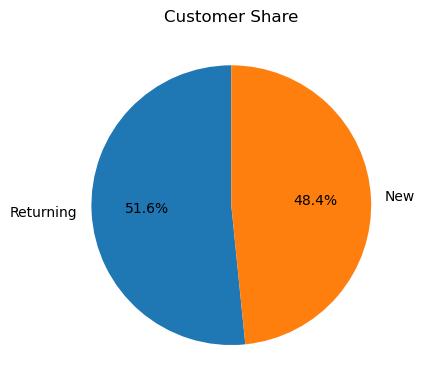

In [153]:
plt.figure(figsize=(6, 4))
data['Customer Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Customer Share")
plt.ylabel("")
plt.tight_layout()
plt.show()

**Key Insights**

Total Revenue: $1425500

Best-selling Product:   Jackett 400,000 total sales)

Most Used Payment Method: Cas (28.6%)h

Sales Peak: Jned had the highest total sales 2500000)

